In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from src.datasets.load_trees import load_trees_from_file
from src.utils.tree_utils import get_taxa_names
from src.utils.tree_utils import get_tree_height
from src.distribution_analysis.process_tree import get_observed_nodes, get_clade_split_df

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [3]:
REFERENCE_TREE_FILE = Path("data/thinned_mcmc_runs/yule-10_5.trees")
SAMPLE_TREES_FILE = Path("data/distribution_data/yule-10_5_sampled-trees_stick-breaking.trees")
NUM_TAXA = 10

In [4]:
ref_trees = load_trees_from_file(REFERENCE_TREE_FILE)

In [5]:
sample_trees = load_trees_from_file(SAMPLE_TREES_FILE)
sample_trees = [
    t for t in sample_trees if get_tree_height(t) < 100
]

In [6]:
taxa_names = get_taxa_names(ref_trees[0])

In [7]:
_, sample_clade_splits = get_observed_nodes(sample_trees, taxa_names)
_, ref_clade_splits = get_observed_nodes(ref_trees, taxa_names)

sample_branches = get_clade_split_df(sample_clade_splits)
ref_branches = get_clade_split_df(ref_clade_splits)

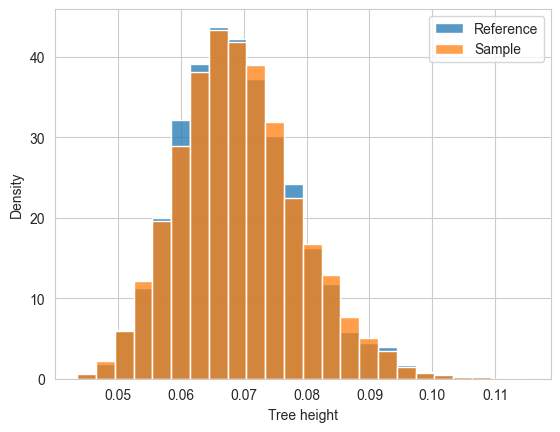

In [8]:
from random import sample
import numpy as np

NUM_PAIRS = 5_000
SAMPLE_SIZE = 5_000
NUM_BINS = 25


ref_tree_heights = [
    get_tree_height(tree)
    for tree in sample(ref_trees, min(SAMPLE_SIZE, len(ref_trees)))
]
sample_tree_heights = [
    get_tree_height(tree)
    for tree in sample(sample_trees, min(SAMPLE_SIZE, len(sample_trees)))
]


def _get_bins(items: list[float]):
    min_item = np.percentile(items, 0.001)
    max_item = np.percentile(items, 99.999)
    return np.linspace(min_item, max_item, NUM_BINS)

bins = _get_bins(ref_tree_heights)

sns.histplot(ref_tree_heights, stat="density", label="Reference", bins=bins)
sns.histplot(sample_tree_heights, stat="density", label="Sample", bins=bins)

plt.xlabel("Tree height")
plt.legend(loc="upper right")

In [9]:
ref_branches

,tree_index,newick_tree,clade_split,left_branch,right_branch,min_branch,min_branch_down,max_branch,distance_to_root,distance_to_leaf,height,clade_split_count
0,0,"(((0,4),((((1,5),9),8),(2,(6,7)))),3);\n",0000000001||0000000010,0.040627,0.040627,0.040627,NaN,0.040627,2,1,0.003909,1106
1,0,"(((0,4),((((1,5),9),8),(2,(6,7)))),3);\n",0000000100||0000001000,0.003081,0.003081,0.003081,NaN,0.003081,5,1,0.041455,48031
2,0,"(((0,4),((((1,5),9),8),(2,(6,7)))),3);\n",0000001100||0000010000,0.021717,0.024798,0.021717,0.003081,0.024798,4,2,0.019738,29950
3,0,"(((0,4),((((1,5),9),8),(2,(6,7)))),3);\n",0000011100||0000100000,0.009196,0.033994,0.009196,0.021717,0.033994,3,3,0.010542,6183
4,0,"(((0,4),((((1,5),9),8),(2,(6,7)))),3);\n",0010000000||0100000000,0.002710,0.002710,0.002710,NaN,0.002710,4,1,0.041827,48031
...,...,...,...,...,...,...,...,...,...,...,...,...
432274,48030,"(((((0,9),((1,5),8)),(2,(6,7))),4),3);\n",0010000000||0100000000,0.003167,0.003167,0.003167,NaN,0.003167,4,1,0.065212,48031
432275,48030,"(((((0,9),((1,5),8)),(2,(6,7))),4),3);\n",0001000000||0110000000,0.038232,0.035065,0.035065,0.003167,0.038232,3,2,0.030147,47593
432276,48030,"(((((0,9),((1,5),8)),(2,(6,7))),4),3);\n",0000111101||0111000000,0.011170,0.012450,0.011170,0.000302,0.012450,2,4,0.017697,839
432277,48030,"(((((0,9),((1,5),8)),(2,(6,7))),4),3);\n",0111111101||0000000010,0.009709,0.060391,0.009709,0.011170,0.060391,1,5,0.007989,354


0000000100||0000001000


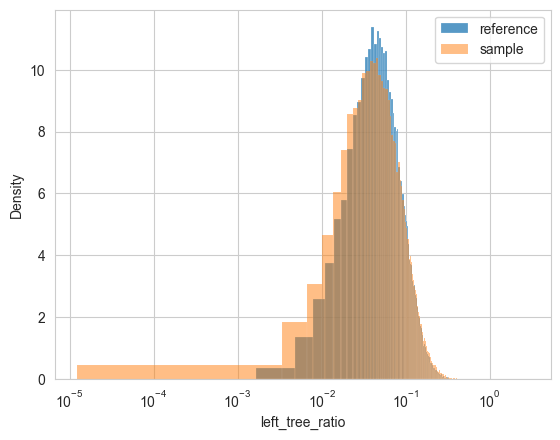

0010000000||0100000000


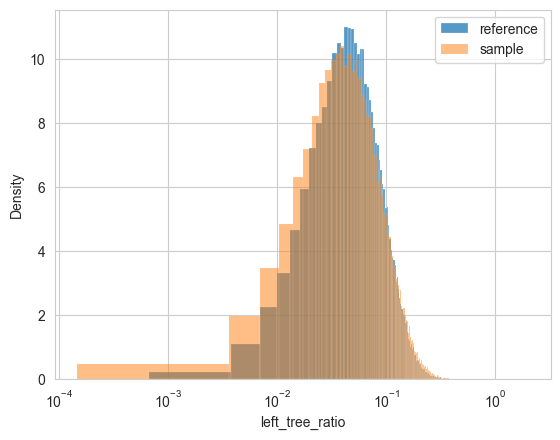

0001000000||0110000000


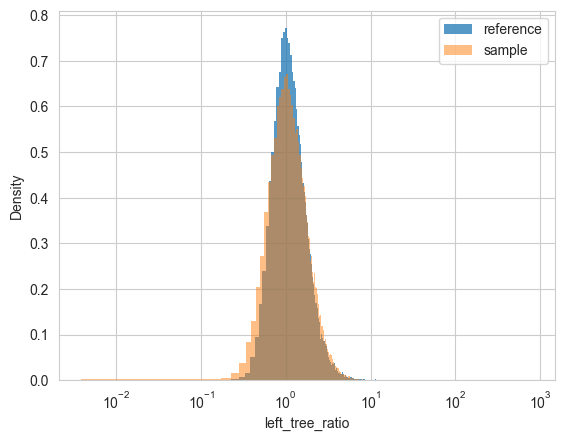

0000001100||0000010000


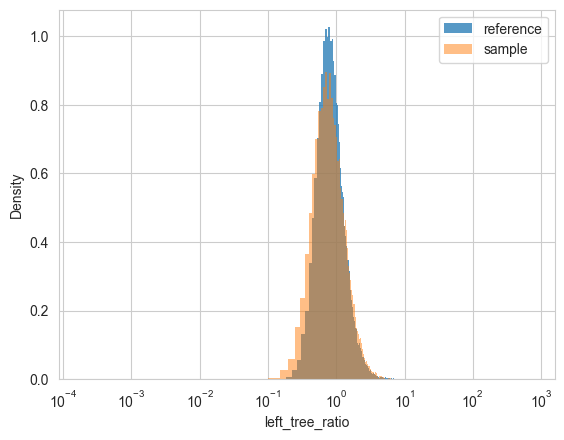

0111000000||0000000010


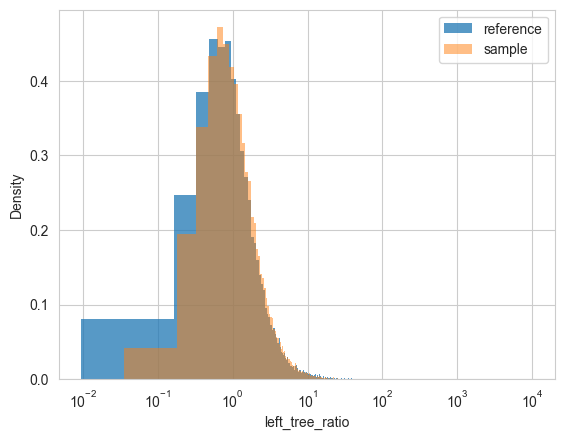

0000000001||0000010000


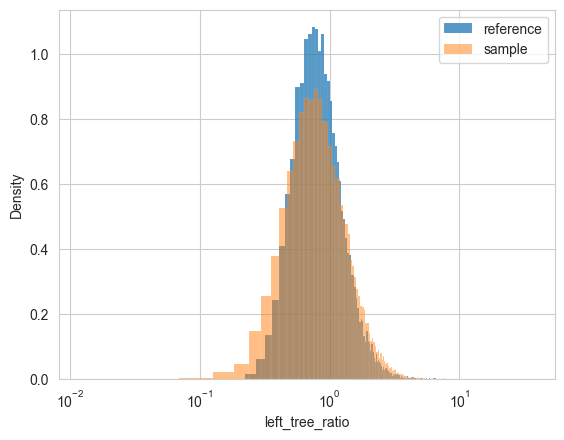

1000111101||0111000010


ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

0000000001||0000011100


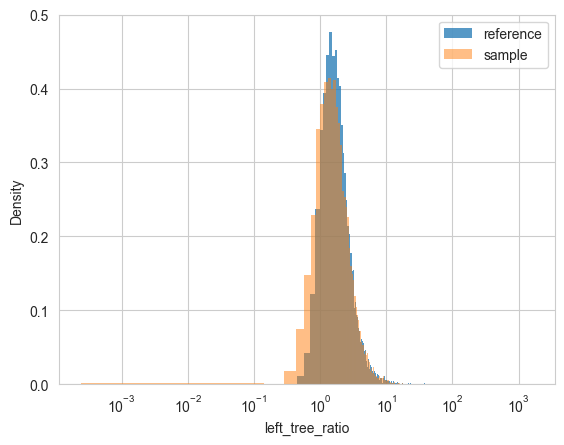

0000010001||0000001100


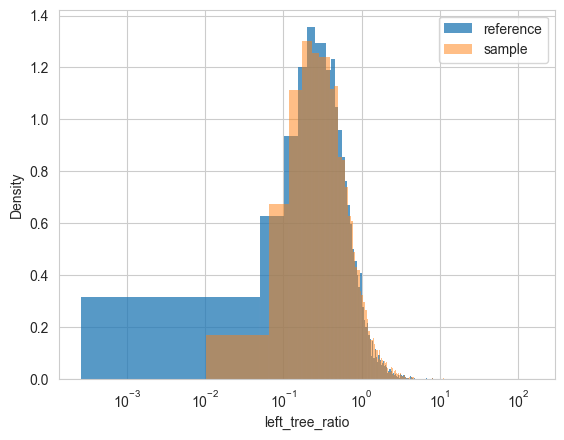

0000011101||0000100000


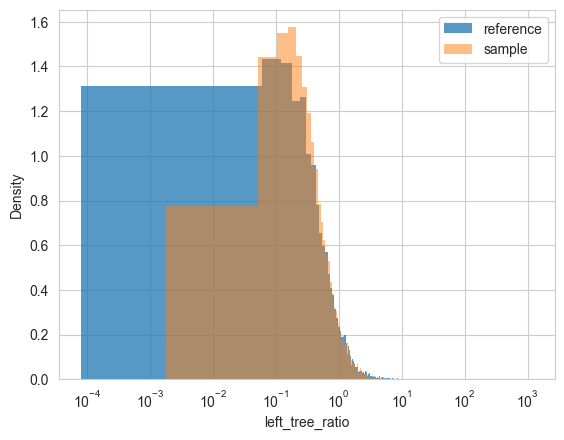

0000000001||1000000000


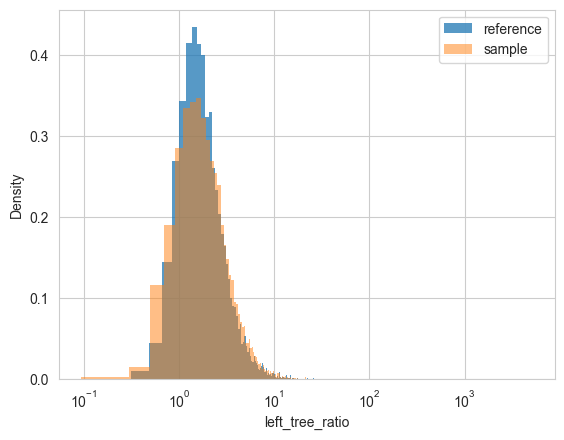

1000011101||0000100000


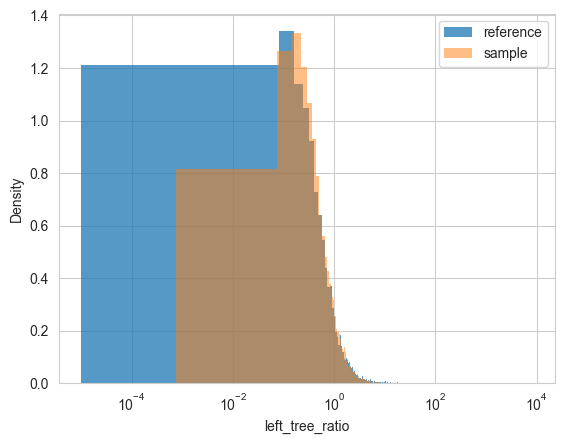

1111111101||0000000010


ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

0000111101||1000000000


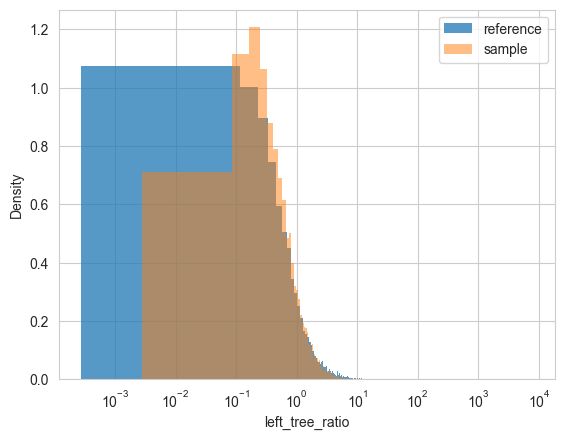

1000111111||0111000000


ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

0000011101||1000000000


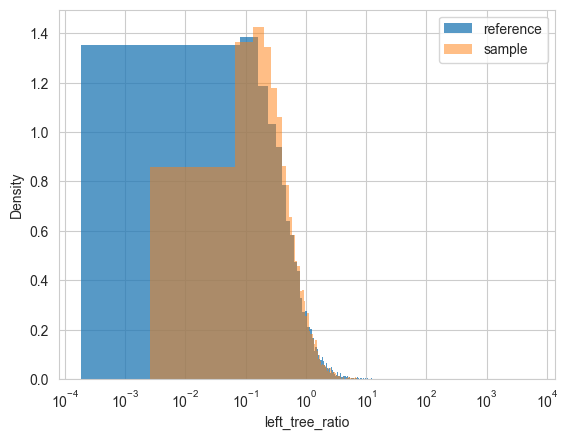

1000111101||0111000000


In [10]:
from collections import Counter

ref_branches["left_tree_ratio"] = ref_branches.left_branch / ref_branches.height
sample_branches["left_tree_ratio"] = sample_branches.left_branch / sample_branches.height

for clade_split, _ in Counter(ref_branches.clade_split).most_common(20):
    print(clade_split)
    
    sns.histplot(
        ref_branches[ref_branches.clade_split == clade_split], 
        x="left_tree_ratio", 
        label="reference",
        stat="density",
    )
    sns.histplot(
        sample_branches[sample_branches.clade_split == clade_split], 
        x="left_tree_ratio", 
        label="sample",
        stat="density",
        alpha=0.5,
    )

    plt.xscale("log")

    plt.legend(loc="upper right")
    plt.show()

